# Importing Libraries

In [ ]:
import pandas as pd
import  numpy as np
from pandas import json_normalize
import json
import plotly.graph_objects as go
from IPython.display import display
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib_inline

#Import libraries
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# importing Dataset


In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# prompt: how to replace values in Gender column with 0 and 1

#dataset['Gender'].replace(['Female','Male'],[0,1],inplace=True)


In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# prompt:  Drop 3 columns in dataset

new_dataset = dataset.drop(columns= ['CustomerID','Gender','Age'])
new_dataset.head()



,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Using the Elbow method to find the optimal numbers of Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

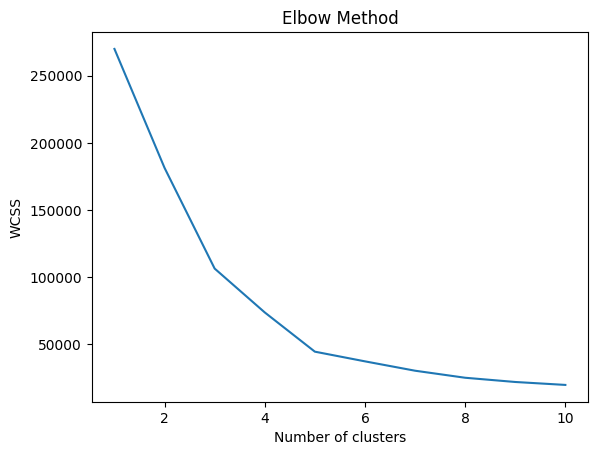

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the KMeans Model on the Dataset

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(new_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Visualising the clusters

In [ ]:
#Assigning colour labels to transformed data set, why l dont understand?
data_process = new_dataset.assign(Cluster = y_kmeans)


In [ ]:
#assigning colour to the cluster
def clust_cols(x):
    if x['Cluster'] == 0:
        return 'yellow'
    elif x['Cluster'] == 1:
        return 'red'
    elif x['Cluster'] == 2:
        return 'blue'
    elif x['Cluster'] == 3:
        return 'green'
    else:
        return 'grey'

data_process['Cluster_color'] = data_process.apply(clust_cols, axis=1)
data_process.head()

,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_color
0,15,39,2,blue
1,15,81,3,green
2,16,6,2,blue
3,16,77,3,green
4,17,40,2,blue


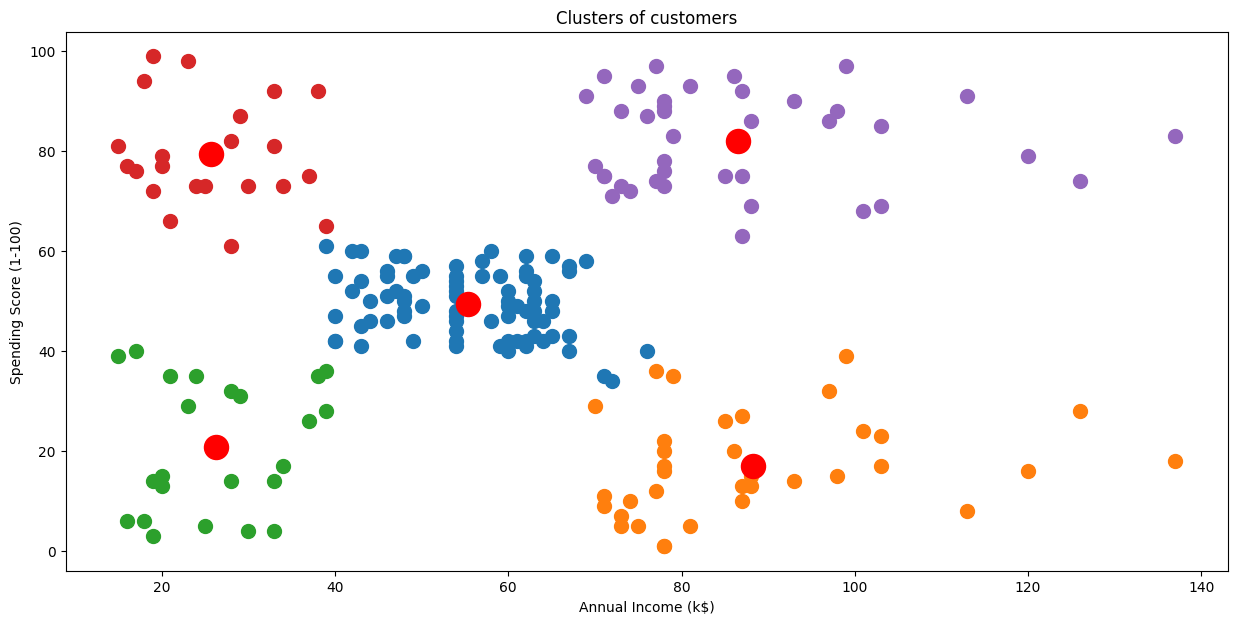

In [ ]:
# prompt: generate code  to  visualise clusters

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

for i in range(5):
    plt.scatter(new_dataset.loc[y_kmeans == i, 'Annual Income (k$)'], new_dataset.loc[y_kmeans == i, 'Spending Score (1-100)'], s=100, label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [ ]:
# prompt: generate code to merge data_process with dropped table

import pandas as pd
merged_data = pd.merge(data_process, dataset[['CustomerID','Gender','Age']], on=None, left_index=True, right_index=True)
merged_data.head()


,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_color,CustomerID,Gender,Age
0,15,39,2,blue,1,Male,19
1,15,81,3,green,2,Male,21
2,16,6,2,blue,3,Female,20
3,16,77,3,green,4,Female,23
4,17,40,2,blue,5,Female,31


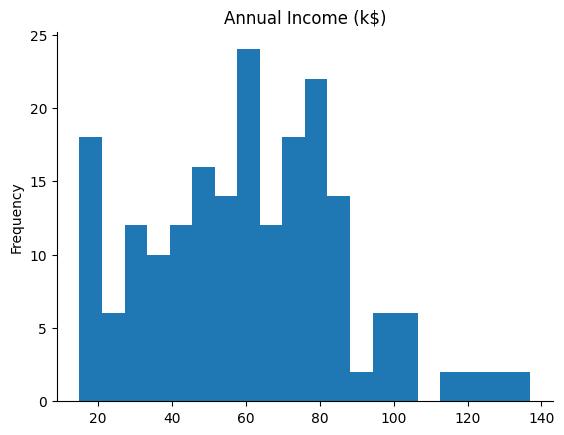

In [ ]:
# @title Annual Income (k$)

from matplotlib import pyplot as plt
merged_data['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

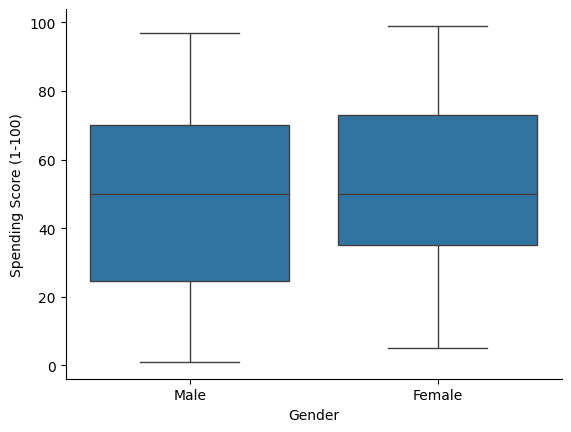

In [ ]:
# prompt: generate code to visualise the highest to lowers spending score per gender

import matplotlib.pyplot as plt
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=merged_data)
plt.gca().spines[['top', 'right',]].set_visible(False)


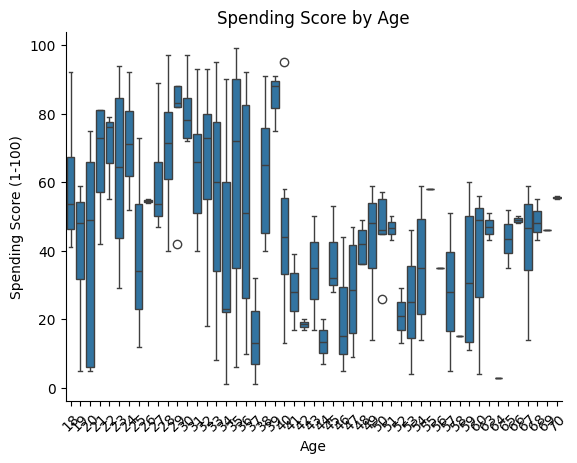

In [ ]:
# prompt: generate code to visualise the  spending score per age

import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of spending score by age
sns.boxplot(x="Age", y="Spending Score (1-100)", data=merged_data)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Set title and labels
plt.title("Spending Score by Age")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()
